In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
resume = pd.read_csv("/content/Resume_Dataset.csv")

In [ ]:
resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
#view an example of a resume from our data
resume['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

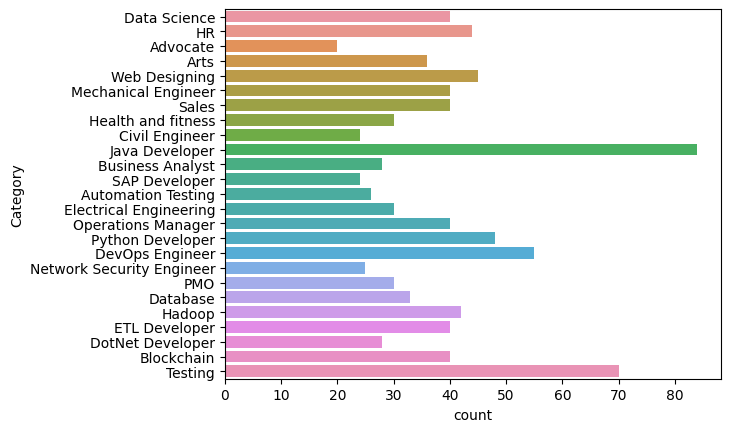

In [ ]:
sns.countplot(y="Category", data=resume)

In [ ]:
#pre-processing of data to remove special characters, hashtags, urls etc
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))


In [ ]:
#data-set after pre-processing
resume

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
# Printing an original resume
print('--- Original resume ---')
print(resume['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [ ]:
# Printing the same resume after text cleaning
print('--- length of Cleaned resume ---')
print(len(resume['cleaned_resume'][0]))

--- length of Cleaned resume ---
4517


In [ ]:

corpus = " "

for i in range(0,962):
  corpus = corpus+resume["cleaned_resume"][i]

In [ ]:
corpus[0:4517]

' Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

In [ ]:
#Obtaining the most common words

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume['cleaned_resume'].values
cleanedSentences = ""
for i in range(len(resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(10)
mostcommon

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438)]

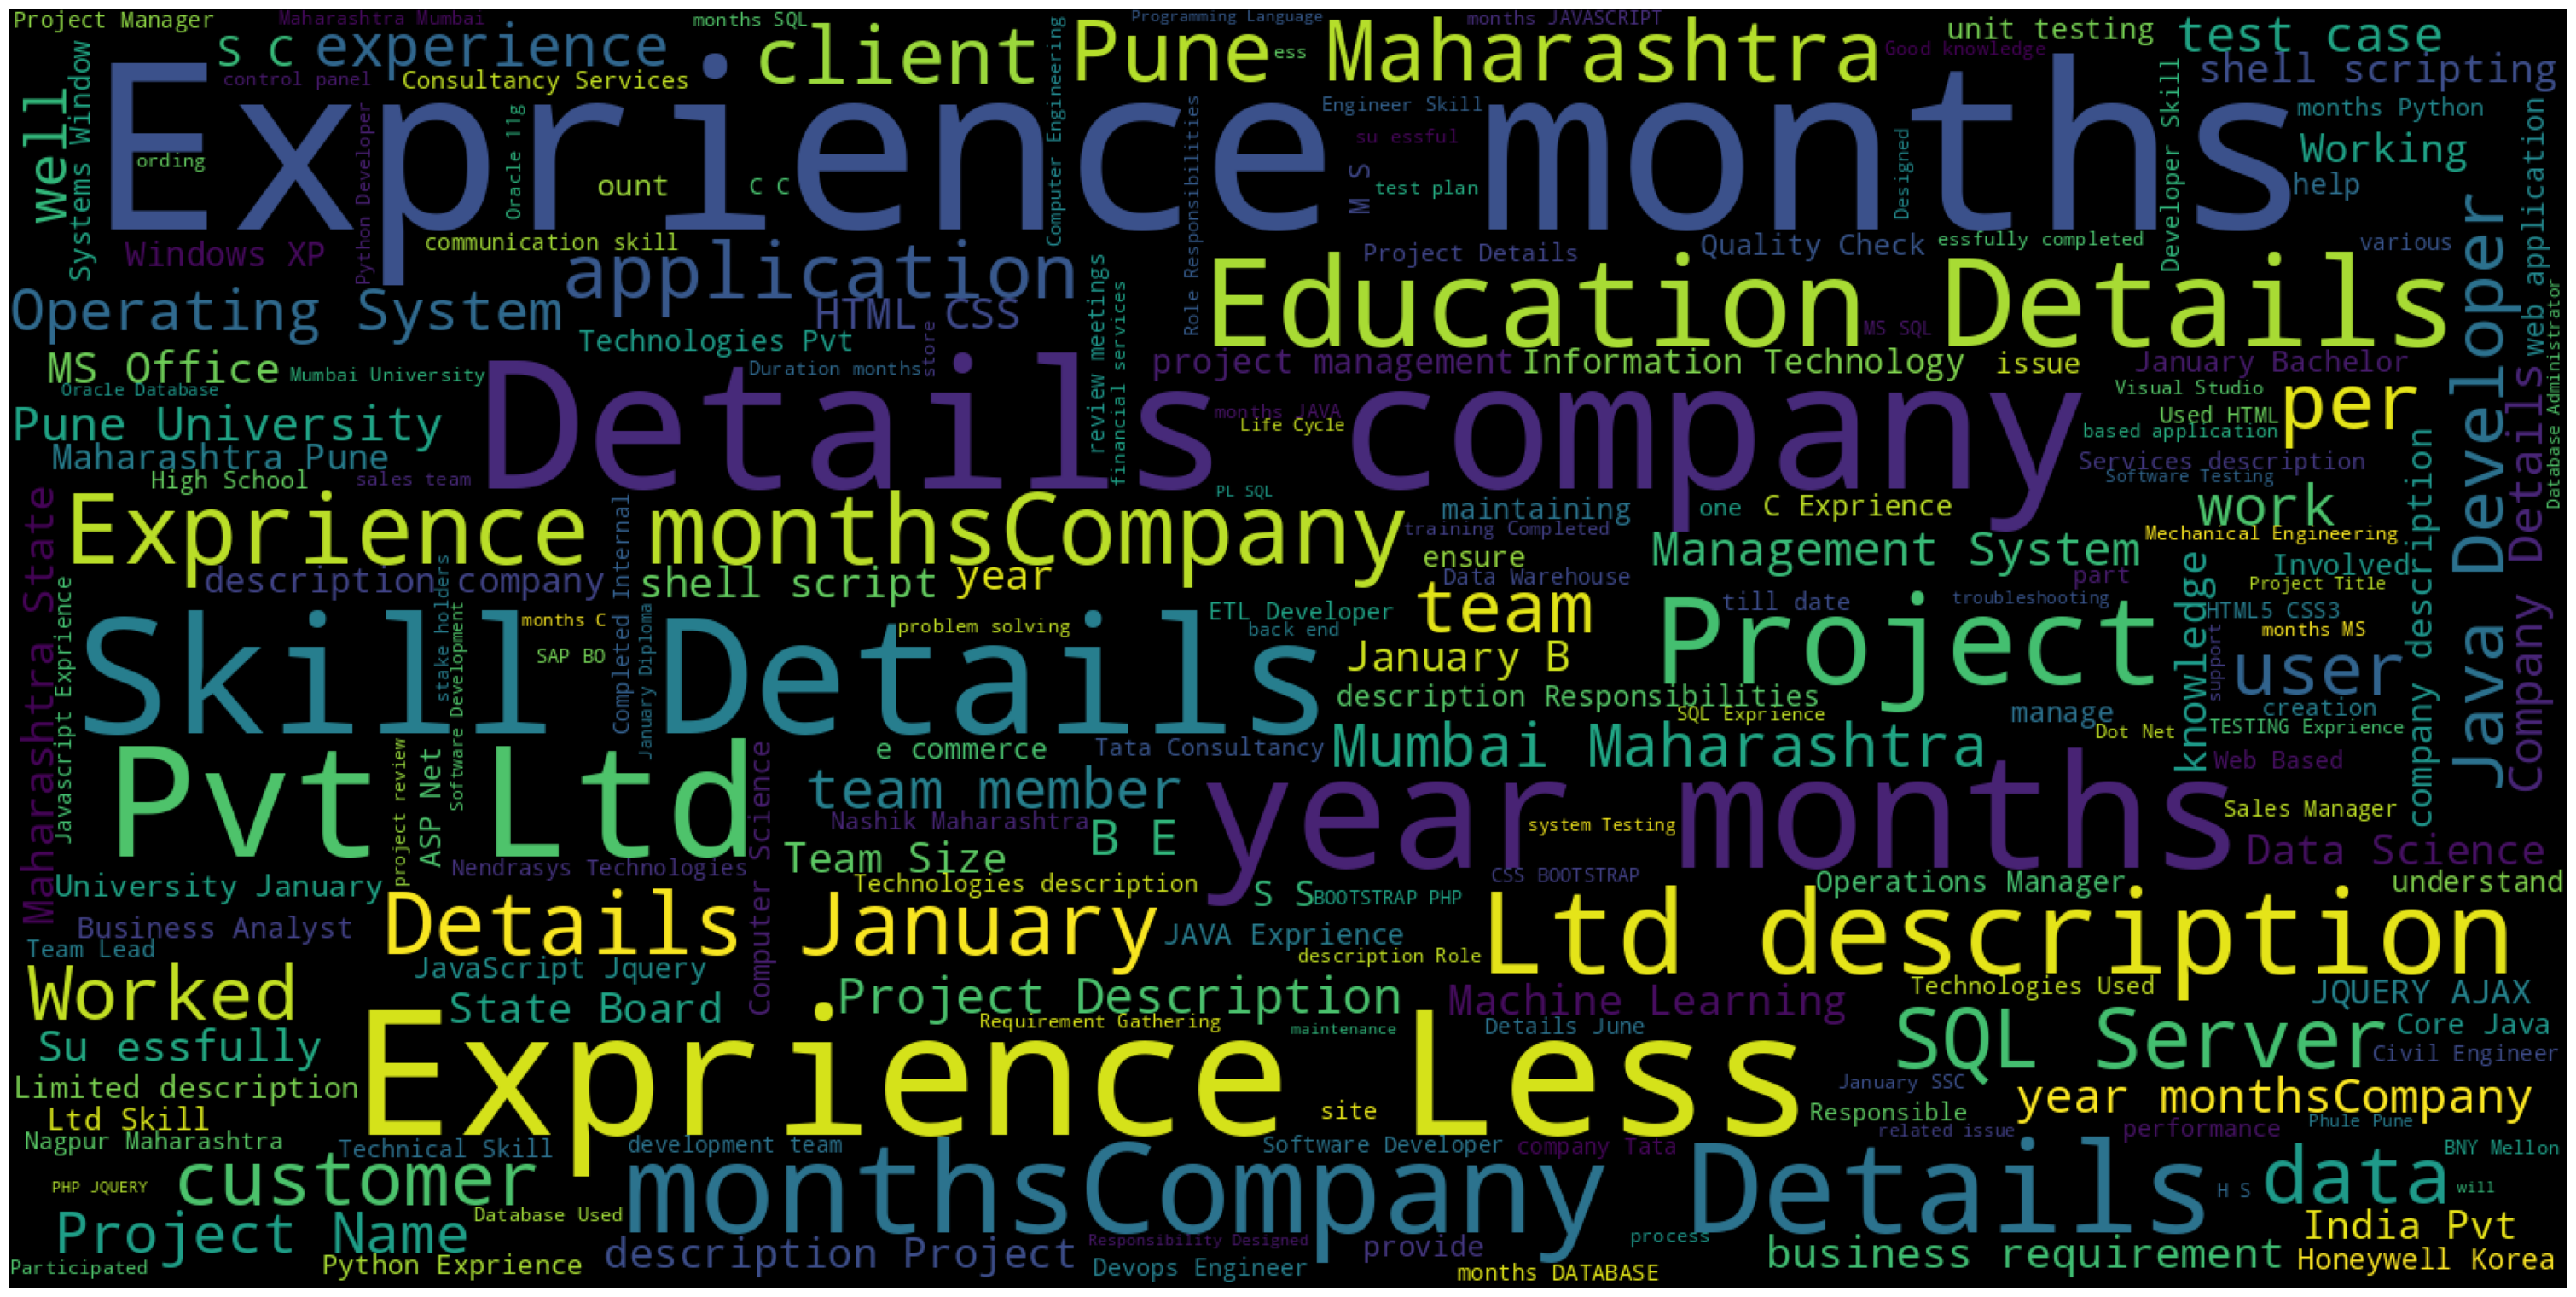

In [ ]:
#Visualising most common words with Wordcloud
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate(cleanedSentences)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

In [ ]:
from sklearn.utils import shuffle

# Get features and labels from data and shuffle
features = resume['cleaned_resume'].values
original_labels = resume['Category'].values
labels = original_labels[:]

for i in range(len(resume)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print len of  feature and  name of label
print(len(features[0]))
print(labels[0])

2367
database


In [ ]:
from sklearn.utils import shuffle

# Get features and labels from data and shuffle
features = resume['cleaned_resume'].values
original_labels = resume['Category'].values
labels = original_labels[:]

for i in range(len(resume)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print len of  feature and  name of label
print(len(features[0]))
print(labels[0])

1780
datascience


In [ ]:
#printing all the features
corpus_1 = ""
for feature in features[0]:
  corpus_1 += feature 
corpus_1[:]



'Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Mr Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Interpreters Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 B Tech Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEKSHA CENTER January 2013 Little Flower Public School August 2000 Manipal Academy of Higher DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHUSIAST Skill Details Data Analysis Exprience Less than 1 year months excel Exprience Less than 1 year mon

In [ ]:
# Split into train and test
train_split = 0.8
train_size = int(train_split * len(resume))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

769
193


In [ ]:
#tokenize features and labels

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())[:20]))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'for': 7, 'exprience': 8, 'with': 9, 'company': 10, 'a': 11, 'project': 12, 'months': 13, 'description': 14, 'details': 15, 'on': 16, 'as': 17, 'data': 18, '1': 19, 'management': 20}


In [ ]:
# Tokenize label data 
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items()))) 

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'datascience': 8, 'blockchain': 9, 'etldeveloper': 10, 'mechanicalengineer': 11, 'operationsmanager': 12, 'sales': 13, 'arts': 14, 'database': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'pmo': 18, 'dotnetdeveloper': 19, 'businessanalyst': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'sapdeveloper': 23, 'civilengineer': 24, 'advocate': 25}


In [ ]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[ 638    4 1217  824  199  140   26   73  262    6   78 2159 3358   77
   32  329   65  100    1 5167    1  259 1429    7  107 1757  594    3
 1605    4 1455    1  277   82    6    3    1    4    1  816    1    1
   65   51  262 1039   78    2   44    1   78    1  699 2407    1 3181
  264    2    2    1 3181 1585    1 3680    1 3302   91 1152   78   53
  970    1 3681    1 4439    1   44 1058  715  198  113   90 1040    1
    1  164   55   15   42 1677  114  331  161    2  342   46 4324  278
    4   93   42  215    1  382   42  383    1    1  780  171  716  816
 4324 1265    4  623   18  133   18  133    2  161 4440   41   15   18
  135    8   38   34   19   28   13  312    8   38   34   19   28   13
  205  199    8   38   34   19   28   13    1    8   38   34   19   28
   13   78    8   38   34   19   28   13 1039    8   38   34   19   28
   13  161   46    8   38   34   19   28   13   40    8   38   34   19
   28   72   15   10    1   14   71  800  971   74    9   11    1   92
    1 

In [ ]:
#Train a sequential model

# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)


In [ ]:
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
25/25 - 17s - loss: 3.2234 - accuracy: 0.1977 - val_loss: 3.1130 - val_accuracy: 0.1762 - 17s/epoch - 685ms/step
Epoch 2/12
25/25 - 10s - loss: 3.0654 - accuracy: 0.1521 - val_loss: 2.8798 - val_accuracy: 0.1865 - 10s/epoch - 416ms/step
Epoch 3/12
25/25 - 10s - loss: 2.4997 - accuracy: 0.2848 - val_loss: 2.2804 - val_accuracy: 0.3420 - 10s/epoch - 380ms/step
Epoch 4/12
25/25 - 10s - loss: 1.8450 - accuracy: 0.4304 - val_loss: 1.6310 - val_accuracy: 0.5233 - 10s/epoch - 415ms/step
Epoch 5/12
25/25 - 13s - loss: 1.2840 - accuracy: 0.6593 - val_loss: 1.2117 - val_accuracy: 0.6477 - 13s/epoch - 530ms/step
Epoch 6/12
25/25 - 10s - loss: 0.9516 - accuracy: 0.7698 - val_loss: 0.7628 - val_accuracy: 0.8394 - 10s/epoch - 408ms/step
Epoch 7/12
25/25 - 10s - loss: 0.6242 - accuracy: 0.8713 - val_loss: 0.5978 - val_accuracy: 0.8860 - 10s/epoch - 403ms/step
Epoch 8/12
25/25 - 9s - loss: 0.5278 - accuracy: 0.8934 - val_loss: 0.6633 - val_accuracy: 0.8705 - 9s/epoch - 360ms/step
Epoch 9/12

In [ ]:
# print any random example feature and its correct predicted label

print(len(test_features[5]))
print(test_labels[5])

2648
hadoop


In [ ]:
#printing all the features
c2 = ""
for feature in test_features[5]:
  c2 += feature 
c2[:]



' Operating systems Linux Ubuntu Windows 2007 08 Other tools Tableau SVN Beyond Compare Education Details January 2016 Bachelors of Engineering Engineering Gujarat Technological University Systems Engineer Hadoop Developer Systems Engineer Hadoop Developer Tata Consultancy Services Skill Details Hadoop Spark Sqoop Hive Flume Pig Exprience 24 monthsCompany Details company Tata Consultancy Services description Roles and responsibility Working for a American pharmaceutical company one of the world s premier biopharmaceutical who develops and produces medicines and va ines for a wide range of medical disciplines including immunology oncology cardiology endocrinology and neurology To handle large amount of United Healthcare data big data analytics is used Data from all possible data sources like records of all Patients Old and New records of medicines Treatment Pathways Patient Journey for Health Outcomes Patient Finder or Rare Disease Patient Finder etc being gathered stored and processed 

In [ ]:
#one more custom prediction example

print(len(test_features[9]))
print(test_labels[9])

4104
electricalengineering


In [ ]:
#printing all the features
c3 = ""
for feature in test_features[9]:
  c3 += feature 
c3[:]



' Achievement oriented with people management skills and an ability to manage change with ease Proven strength in problem solving coordination and analysis Strong communication interpersonal learning and organizing skills matched with the ability to manage stress time and people effectively Able to handle multiple task projects simultaneously Willing to travel relocate Education Details B E Electrical and Electronics Engineering Gulbarga Karnataka VTU Vishweshwariya University HSC Wai Maharashtra Kisanveer Mahavidyalay WAI Kohlapur University Electrical Engineer Electrical Engineer REFCON ENGINEERING PVT LTD Skill Details Company Details company REFCON ENGINEERING PVT LTD description GREENFIELD PROJECT Project Status 1 LIBS Braseries Burkena Faso Africa Completed 2 Citrus Processing India Nanded Completed 3 Carlsberg Group Myanmar Yangon Completed 4 U B United Breweries Mysore Completed 5 U B United Breweries Hyderabad Completed 6 Haldiram Foods Pvt Ltd Nagpur Completed 7 Tetra Pak Ind

In [ ]:
#one more custom prediction example

print(len(test_features[190]))
print(test_labels[190])

4297
networksecurityengineer


In [ ]:
#determining test score and accuracy
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

7/7 [==============================] - 1s 75ms/step - loss: 0.0759 - accuracy: 0.9948
Test Score: 0.07585938274860382
Test Accuracy: 0.9948186278343201


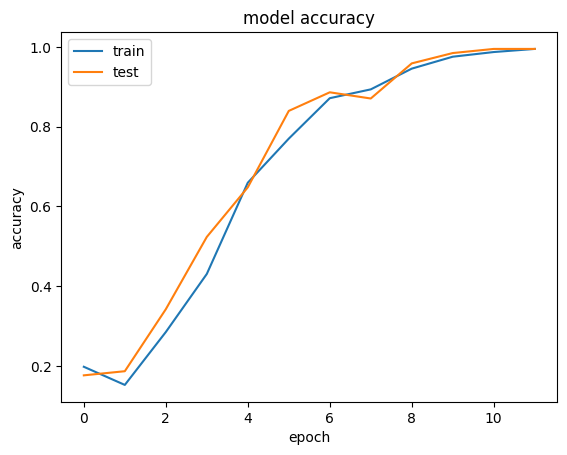

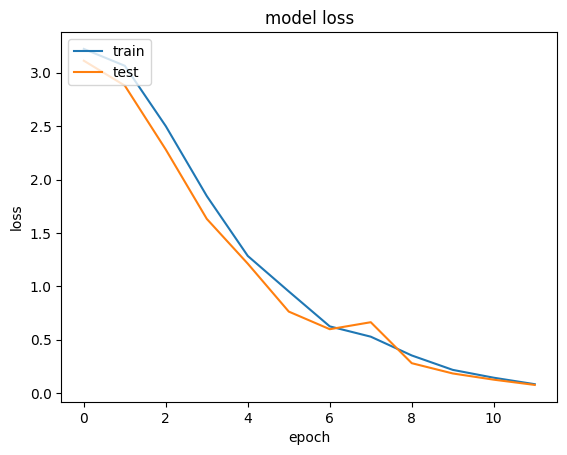

In [ ]:
#Visualising the model accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
to_predict = [test_feature_padded[3], test_feature_padded[8], test_feature_padded[17]]
to_predict_array = np.array(to_predict).reshape(len(to_predict), -1)
predicted_probabilities = model.predict(to_predict_array)
predictions = (predicted_probabilities > 0.5).astype('int')



1/1 [==============================] - 1s 1s/step


In [ ]:
import tensorflow as tf

# Assuming `test_feature_padded` is a list of preprocessed and padded input features
to_predict = [test_feature_padded[3], test_feature_padded[8], test_feature_padded[17]]

# Assuming `model` is a trained TensorFlow model
prediction = tf.argmax(model.predict(tf.constant(to_predict)), axis=-1).numpy()

# Print the prediction
print(prediction)

1/1 [==============================] - 0s 66ms/step
[16 20  8]


In [ ]:
print(test_labels[3])
print(test_labels[8])
print(test_labels[17])

electricalengineering
businessanalyst
datascience
